dimension = number of features

# K - means clustering

In [9]:
import pandas as pd
import numpy as np
samples =pd.DataFrame({
    'year': [1950, 1970, 1990, 2010, 2050, 2100],
    'pop': [2.519, 3.692, 5.263, 6.9720,  8.94, 10.85],
    'areaa': [1009, 455, 789, 170, 344, 767]
})
samples

,year,pop,areaa
0,1950,2.519,1009
1,1970,3.692,455
2,1990,5.263,789
3,2010,6.972,170
4,2050,8.940,344
5,2100,10.850,767


In [8]:
new_samples =pd.DataFrame({
    'year': [1950, 1950, 1940, 2010, 2090, 2100],
    'pop': [9.519, 3.692, 5.863, 6.9720,  10.94, 4.85],
    'areaa': [342, 677, 399, 200, 1898, 767]
})

In [18]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)
model.fit(samples)
labels = model.predict(samples)

# labels = fit_predict(samples)

labels

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 0, 1, 1, 0])

In [19]:
new_labels = model.predict(new_samples)
new_labels

array([1, 0, 1, 1, 2, 0])

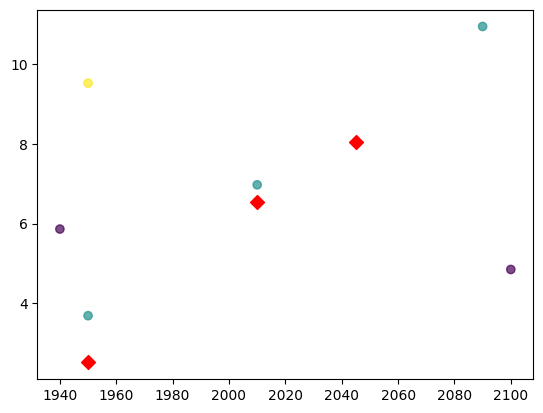

In [27]:
import matplotlib.pyplot as plt
year=[1950, 1950, 1940, 2010, 2090, 2100]
pop = [9.519, 3.692, 5.863, 6.9720,  10.94, 4.85]
plt.scatter(year,pop, c = labels, alpha = 0.7) # print with cluster as labers

centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
plt.scatter(centroids_x, centroids_y, c = 'red', marker = 'D', s=50) # s =size, marker = Dimond
plt.show()

# K-means by scipy

In [18]:
from scipy.cluster.vq import kmeans, vq
centroids,_ = kmeans(samples, 3)
Cluster_labels = vq(samples,centroids)
Cluster_labels[:1]

(array([2, 1, 0, 1, 1, 0]),)

In [68]:
_

74.75271996702173

In [73]:
Cluster_labels

(array([2, 1, 0, 1, 1, 0]),
 array([  0.        , 137.95680757,  56.15873612, 153.00062503,
         45.24141497,  56.15873612]))

In [13]:
centroids

array([[1950.        ,    2.519     , 1009.        ],
       [2010.        ,    6.53466667,  323.        ],
       [2045.        ,    8.0565    ,  778.        ]])

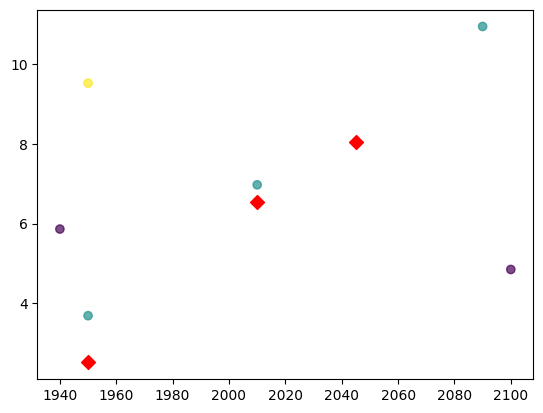

In [19]:
year=[1950, 1950, 1940, 2010, 2090, 2100]
pop = [9.519, 3.692, 5.863, 6.9720,  10.94, 4.85]
plt.scatter(year,pop, c = Cluster_labels[:1], alpha = 0.7) # print with cluster as labers

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
plt.scatter(centroids_x, centroids_y, c = 'red', marker = 'D', s=50) # s =size, marker = Dimond
plt.show()

In [77]:
year=[1950, 1950, 1940, 2010, 2090, 2100]
pop = [9.519, 3.692, 5.863, 6.9720,  10.94, 4.85]
dfkm = pd.DataFrame({'y': [1950, 1950, 1940, 2010, 2090, 2100],
        'p': [9.519, 3.692, 5.863, 6.9720,  10.94, 4.85]})
centroids,_ = kmeans(dfkm, 3)
dfkm['labels'], distortion = vq(dfkm,centroids)
dfkm

,y,p,labels
0,1950,9.519,2
1,1950,3.692,2
2,1940,5.863,2
3,2010,6.972,1
4,2090,10.940,0
5,2100,4.850,0


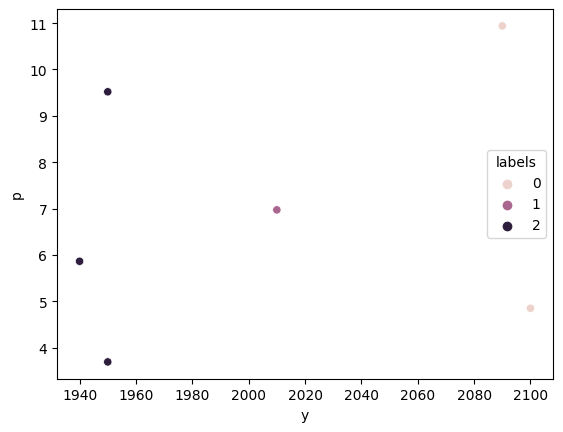

In [83]:
sns.scatterplot(x='y', y='p', 
                hue='labels', data = dfkm)
plt.show()

#### kmeans(observation, clusters, iter, tresh, check_finite)
 - observation - standaraized data
 - clusters - number of clusters
 - iter, number of iteration (default:20)
 - tresh, treshold(default: 1e-0)
     - algorithm is terminated if the change in distortion since the last k-means iteration is less than or equal to the threshold
 - check_finite(default: True)
     - a check needs to be performed on the data for the presence of infinite or NaN values. The default value is True, which ensures that data points with NaN or infinite values are not considered for classification

Return:
- cluster centers
- distortion, is calculated as the sum of square of distances between the data points and cluster centers

#### vq(observation, centroids, check_finite)
- observation - standaraized data
- centroids
- check_finite

Return:
- cluster labels
- distortion

### How many clusters?
- elbow method
- average silhouette
- gap statistic methods

In [86]:
dfd = pd.DataFrame({'y': [1950, 1950, 1940, 2010, 2090, 2100, 2045, 2019, 1998, 2034],
        'p': [9.519, 3.692, 5.863, 6.9720, 10.94, 4.85, 5.43, 6.324, 8.54, 2.54]})

distortions = []
num_cluster = range(2,7)

for i in num_cluster:
    centroids, dist = kmeans(dfkm, i)
    distortions.append(dist)

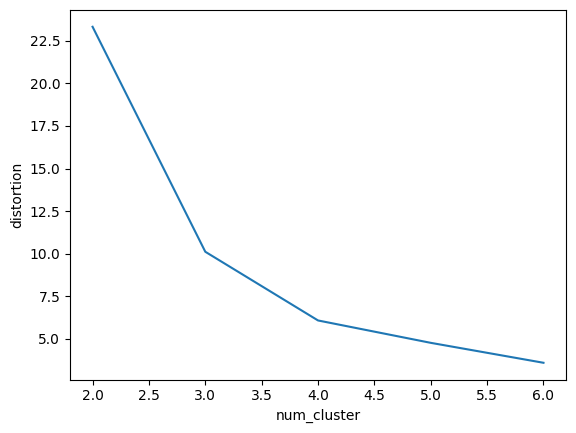

In [88]:
elbo_data = ({'num_cluster':num_cluster,
             'distortion': distortions})

sns.lineplot(x ='num_cluster', y ='distortion', data = elbo_data )
plt.show()

### Normalization

In [22]:
from scipy.cluster.vq import whiten

In [23]:
data = [1,4,3,6,7,8,9,12,1,1,5]
scaled_data = whiten(data)
scaled_data

array([0.28907358, 1.15629433, 0.86722075, 1.73444149, 2.02351508,
       2.31258866, 2.60166224, 3.46888299, 0.28907358, 0.28907358,
       1.44536791])

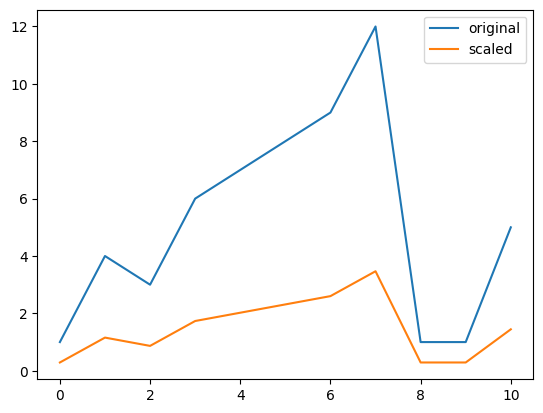

In [25]:
plt.plot(data, label = 'original')
plt.plot(scaled_data, label = 'scaled')
plt.legend()
plt.show()

# Evaluating a clustering

In [33]:
species = ['two', 'two','zero', 'one', 'zero', 'zero']
labels_species = pd.DataFrame({'labels': labels, 'species' : species})
labels_species

,labels,species
0,2,two
1,1,two
2,0,zero
3,1,one
4,1,zero
5,0,zero


In [34]:
ct = pd.crosstab(labels_species['labels'],labels_species['species']) 
ct

species,one,two,zero
labels,,,
0,0,0,2
1,1,1,1
2,0,1,0


In [35]:
# inertia (bezwładność), how far away the values are from centroids
model.inertia_
# the number of clusters has impact on it
# elbow on inertia plot

50795.66492716667

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will

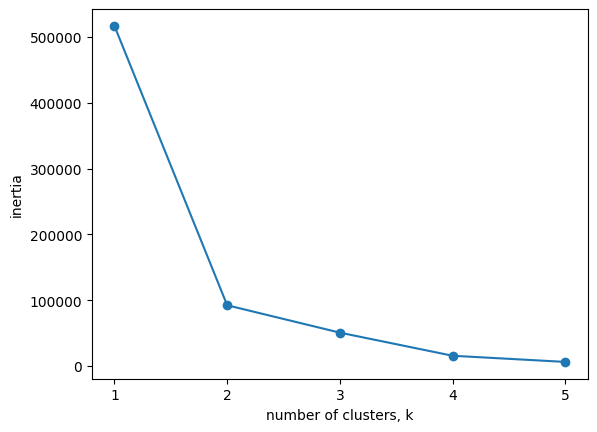

In [36]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# Feature variance
Should be the same for each feature in Kmeans

In [37]:
wine = pd.read_csv('wine.csv')

In [38]:
wine.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [40]:
wine_df = wine.iloc[:,2:15]
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [42]:
w_model = KMeans(n_clusters = 3)
w_model.fit(wine_df)
w_labels = w_model.predict(wine_df)

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [43]:
ct = pd.crosstab(w_labels,wine['class_name']) 
ct

class_name,Barbera,Barolo,Grignolino
row_0,,,
0,19,0,50
1,0,46,1
2,29,13,20


### StandardScaler
- mean = 0, variance = 1
- changes each column 
- It arranges the data in a standard normal distribution. 
- It is more useful in classification than regression

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(wine_df)
StandardScaler(copy = True, with_mean = True, with_std = True)
samples_scaled = scaler.transform(wine_df)

In [45]:
# pipeline
from sklearn.pipeline import make_pipeline

model = KMeans(n_clusters = 3)
scaler = StandardScaler()

pipeline = make_pipeline(scaler,model)
pipeline.fit(wine_df)
w_pipe_labels = pipeline.predict(wine_df)

ct = pd.crosstab(w_pipe_labels,wine['class_name']) 
ct

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


class_name,Barbera,Barolo,Grignolino
row_0,,,
0,0,59,3
1,0,0,65
2,48,0,3


### Normalizer
- It squeezes the data between 0 and 1. 
- changes each row 
- Is more useful in regression than classification

In [46]:
from sklearn.preprocessing import Normalizer 

normalizer = Normalizer()
kmeans = KMeans(n_clusters = 3)

pipeline = make_pipeline(normalizer,kmeans)
pipeline.fit(wine_df)
w_pipen_labels = pipeline.predict(wine_df)

ct = pd.crosstab(w_pipen_labels,wine['class_name']) 
ct

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


class_name,Barbera,Barolo,Grignolino
row_0,,,
0,40,8,33
1,4,0,33
2,4,51,5


# Hierarchical clustering
- The y-axis of the dendrogram encodes the distance between merging clusters
- "linkage method": "complete" linkage, where the distance between two clusters is the maximum of the distances between their samples.

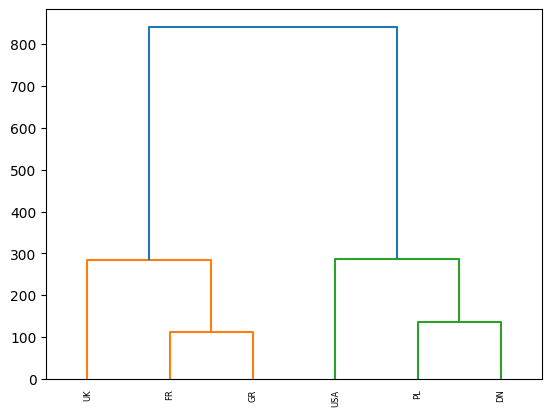

In [3]:
import pandas as pd
samples =pd.DataFrame({
    'year': [1950, 1970, 1990, 2010, 2050, 2100],
    'pop': [2.519, 3.692, 5.263, 6.9720,  8.94, 10.85],
    'areaa': [1009, 455, 789, 170, 344, 767]
})
species = ['UK', 'PL','FR', 'USA', 'DN', 'GR']

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# linkage method computes distances between clusters, creating distance metrix
mergins = linkage(samples, method = "complete")

dendrogram(mergins, labels=species, leaf_rotation = 90, leaf_font_size = 6 )

plt.show()

In [4]:
# fcluster method generates clusters and assigns associated cluster labels to a new column in the DataFrame
labels = fcluster(mergins, 130,  criterion = 'distance')
# labels_max_nr_clusters = fcluster(mergins, 2, criterion='maxclust')
pairs = pd.DataFrame({'labels':labels, 'countries':species})
print(pairs.sort_values('labels').reset_index())

   index  labels countries
0      2       1        FR
1      5       1        GR
2      0       2        UK
3      1       3        PL
4      4       4        DN
5      3       5       USA


In [5]:
labels

array([2, 3, 1, 5, 4, 1], dtype=int32)

In [7]:
l = pd.DataFrame(labels)
l

,0
0,2
1,3
2,1
3,5
4,4
5,1


In [18]:
ct = pd.crosstab(pairs['labels'],pairs['countries'])
ct

countries,DN,FR,GR,PL,UK,USA
labels,,,,,,
1,0,1,1,0,0,0
2,0,0,0,0,1,0
3,0,0,0,1,0,0
4,1,0,0,0,0,0
5,0,0,0,0,0,1


### linkage(data, method = "complete", metric = 'euclidean', optimal_ordnering = False)
- method:
    - how to calculate proximity
    - decides how clusters are separated at each step:
        - 'single' -  based on their two closest objects
        - 'complete' - based on their two farthest objects
        - 'average'- based on arithmetic means
        - 'centroid ' -based on geometric means
        - 'median' - uses the median of cluster objects
        - 'ward' -  using the difference between summed squares of their joint clusters minus the individual summed squares. The ward method focuses on clusters more concentric towards its center
- metric:
    - distnace metric, 'euclidean'= straight line
- optimal_ordnering:
    - changes the order of linkage matrix
    
### fcluster(linkage(), t,  criterion = 'distance')
- t
    - For criteria ‘inconsistent’, ‘distance’ or ‘monocrit’,
    this is the threshold to apply when forming flat clusters.
    - For ‘maxclust’ or ‘maxclust_monocrit’ criteria,
    this would be max number of clusters requested
- criterion
    - the criteria to form the clusters based on certain thresholds
-

### Limitations of hierarchical clustering

In [40]:
import random, timeit

points = 100
df = pd.DataFrame({'x': random.sample(range(0, points), points),
                   'y': random.sample(range(0, points), points)
                  })
%timeit linkage(df[['x','y']], method = "ward", metric = 'euclidean')

1.11 ms ± 136 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [64]:
points = np.arange(10,100,10)
for i in points:
    df = pd.DataFrame({'x': random.sample(range(0, i), i),'y': random.sample(range(0, i), i)})
    %timeit linkage(df[['x','y']], method = "ward", metric = 'euclidean')

792 µs ± 34.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.01 ms ± 339 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.15 ms ± 181 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.08 ms ± 296 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
739 µs ± 46.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.16 ms ± 226 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.02 ms ± 177 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
967 µs ± 202 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
881 µs ± 46.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# t-SNE
- It maps samples from their high-dimensional space into a 2- or 3-dimensional space so they can visualized
- it will maximize the distance in two-dimensional space between observations that are most different in a high-dimensional space.

In [32]:
samples.values

array([[1950.   ,    2.519, 1009.   ],
       [1970.   ,    3.692,  455.   ],
       [1990.   ,    5.263,  789.   ],
       [2010.   ,    6.972,  170.   ],
       [2050.   ,    8.94 ,  344.   ],
       [2100.   ,   10.85 ,  767.   ]])

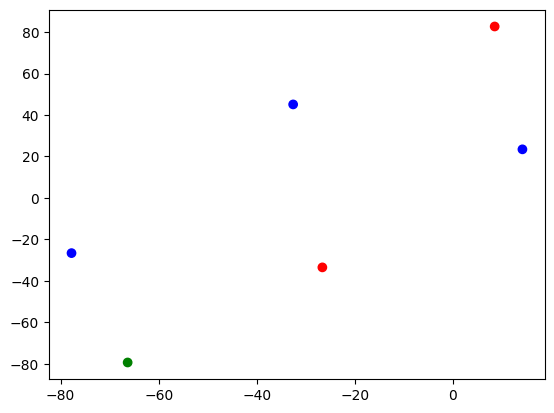

In [41]:
species = ['red', 'red','blue', 'green', 'blue', 'blue']
from sklearn.manifold import TSNE
model_t = TSNE(perplexity=4,learning_rate = 100)
transformed = model_t.fit_transform(samples.values)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c= species )
plt.show()

In [141]:
ANSUR = pd.read_csv('data\ANSUR_II_FEMALE.csv')
ANSUR.shape

(1986, 99)

In [142]:
# t_SNE does not work with not numeric data
non_numeric = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch']
ANSUR_numeric = ANSUR.drop(non_numeric, axis = 1)

In [143]:
from sklearn.manifold import TSNE
model_ta = TSNE(learning_rate = 50)
tsne_features = model_ta.fit_transform(ANSUR_numeric)
tsne_features[1:4,:]

array([[ -9.005669, -37.60087 ],
       [-23.42587 , -23.715586],
       [-21.571384,   7.478587]], dtype=float32)

In [148]:
ANSUR['x'] = tsne_features[:,0]
ANSUR['y'] = tsne_features[:,1]

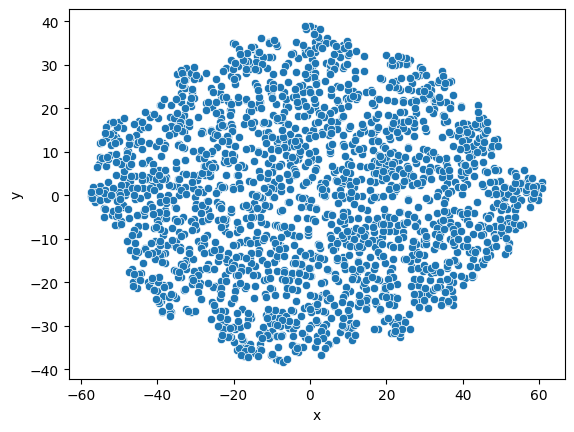

In [149]:
sns.scatterplot(x ='x', y='y', data =ANSUR)
plt.show()

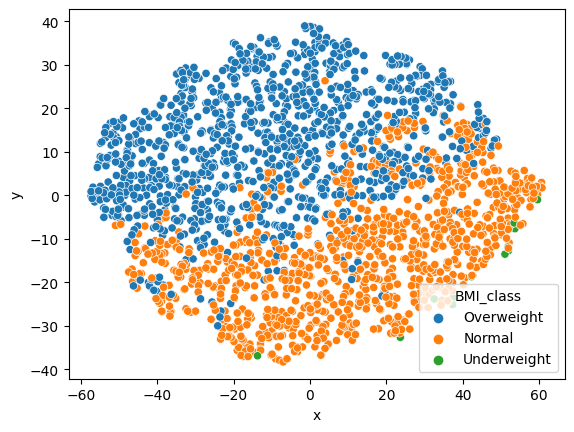

In [150]:
sns.scatterplot(x ='x', y='y', hue = 'BMI_class', data =ANSUR)
plt.show()

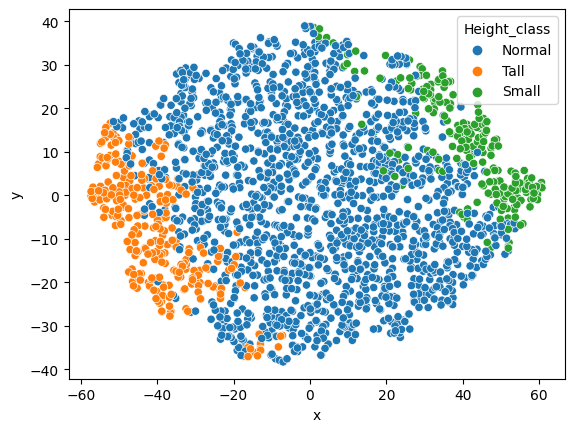

In [151]:
sns.scatterplot(x ='x', y='y', hue = 'Height_class', data =ANSUR)
plt.show()

# PCA -  "Principal Component Analysis", Dimension reduction
- PCA  shifts the samples so that they have mean zero
- the columns of the transformed array are not linearly correlated
- it learns the "principal components" (głowne skałdaniki) of the data

In [46]:
samples.iloc[:,0:2].values

array([[1950.   ,    2.519],
       [1970.   ,    3.692],
       [1990.   ,    5.263],
       [2010.   ,    6.972],
       [2050.   ,    8.94 ],
       [2100.   ,   10.85 ]])

In [47]:
samples_PCA= samples.iloc[:,0:2].values
from sklearn.decomposition import PCA
model_PCA = PCA()
model_PCA.fit(samples_PCA)
transformed_PCA = model_PCA.transform(samples_PCA)
transformed_PCA

array([[-61.78592698,  -0.35742418],
       [-41.75159665,  -0.31821751],
       [-21.69474124,   0.11835125],
       [ -1.63007564,   0.69269881],
       [ 38.41719187,   0.39371803],
       [ 88.44514863,  -0.5291264 ]])

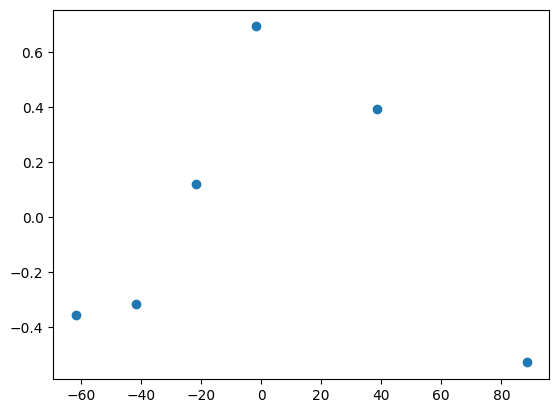

In [67]:
plt.scatter(transformed_PCA[:,0], transformed_PCA[:,1])
plt.show()

In [48]:
model_PCA.components_ # directions of component

array([[ 0.99839718,  0.05659566],
       [-0.05659566,  0.99839718]])

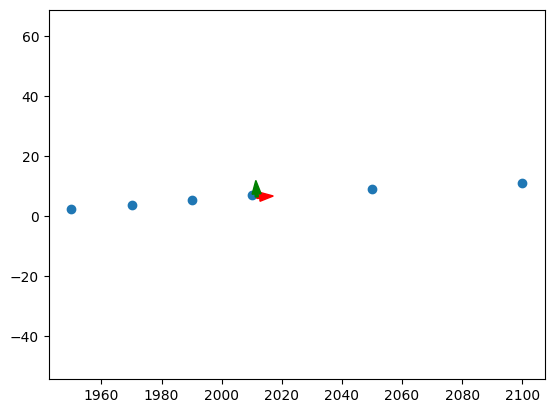

In [75]:
plt.scatter(samples_PCA[:,0], samples_PCA[:,1])
mean = model_PCA.mean_
second_pc = model_PCA.components_[1,:]
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=1)
plt.arrow(mean[0], mean[1], second_pc[0], second_pc[1], color='green', width=1)
plt.axis('equal')
plt.show()

In [49]:
from scipy.stats import pearsonr
correlation, pvalue = pearsonr(transformed_PCA[:,0], transformed_PCA[:,1])
print(correlation, pvalue)

-3.885780586188048e-16 0.9999999999999993


# Intrinsic dimension of PCA
- The intrinsic (wewnętrzny) dimension is the number of PCA features that have significant variance

In [62]:
pca_ID = PCA()
pca_ID.fit(samples.transpose().values)
features = range(pca_ID.n_components_)
features

range(0, 3)

In [63]:
pca_ID.explained_variance_

array([6.40097551e+06, 1.62089482e+05, 6.92346403e-26])

In [64]:
pca_ID.explained_variance_

array([6.40097551e+06, 1.62089482e+05, 6.92346403e-26])

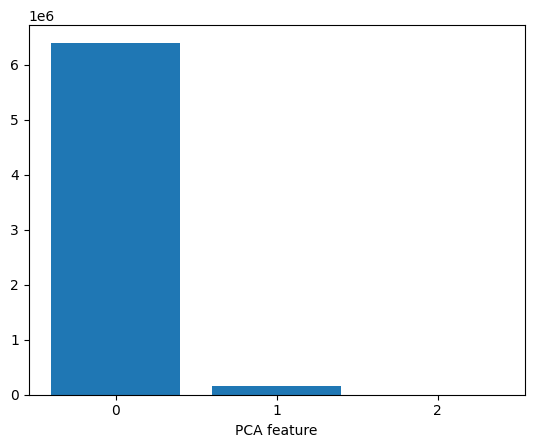

In [65]:
# Explained variance is a statistical measure of how much variation in a dataset can be attributed to each of the 
# principal components (eigenvectors) generated by the principal component analysis (PCA) method. 
# In other words, it tells us how much of the total variance is “explained” by each component.
plt.bar(features, pca_ID.explained_variance_)
plt.xticks(features)
plt.xlabel('variance')
plt.xlabel('PCA feature')
plt.show()

# Dimension reduction 

In [97]:
samples_DR =pd.DataFrame({
    'year': [1950, 1970, 1990, 2010, 2050, 2100],
    'pop': [2.519, 3.692, 5.263, 6.9720,  8.94, 10.85],
    'areaa': [1009, 455, 789, 170, 344, 767],
    'PKB': [30, 20, 50, 10, 120, 30]
})
species_DR = ['red', 'red','blue', 'green', 'blue', 'blue']
pca_4 = PCA(n_components = 4)
pca_4.fit(samples_DR)
transformed_DR = pca_4.transform(samples_DR)
transformed_DR.shape

(6, 4)

In [98]:
transformed_DR

array([[ 4.22136867e+02, -4.55123362e+01,  1.11578296e+01,
        -4.00159190e-02],
       [-1.31973117e+02, -5.27113885e+01, -6.93638119e+00,
         4.83813171e-01],
       [ 2.00513617e+02, -9.75590477e+00,  1.46339264e+01,
        -2.82853794e-01],
       [-4.18032838e+02, -3.04205781e+01, -3.15956504e+01,
        -3.12864771e-01],
       [-2.47510336e+02,  5.37580645e+01,  5.68112263e+01,
         4.71026288e-02],
       [ 1.74865806e+02,  8.46421431e+01, -4.40709507e+01,
         1.04818684e-01]])

In [99]:
pca_4.components_

array([[-0.03626907, -0.00318175,  0.99919089, -0.01708807],
       [ 0.92952791,  0.05188619,  0.04011145,  0.36287292],
       [-0.36288298, -0.01694122,  0.00270742,  0.93167677],
       [ 0.05457438, -0.99850423, -0.00114552,  0.00310336]])

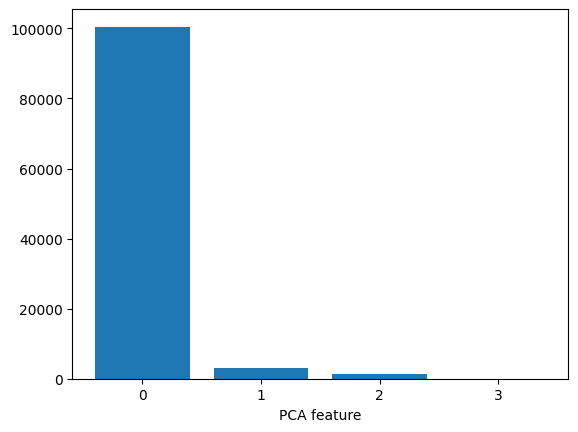

In [100]:
features_RD = range(pca_4.n_components_)
pca_4.explained_variance_
plt.bar(features_RD, pca_4.explained_variance_)
plt.xticks(features_RD)
plt.xlabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [101]:
pd.DataFrame(pca_4.components_, columns=samples_DR.columns,index = ['PC-1','PC-2', 'PC-3','PC-4'])

,year,pop,areaa,PKB
PC-1,-0.036269,-0.003182,0.999191,-0.017088
PC-2,0.929528,0.051886,0.040111,0.362873
PC-3,-0.362883,-0.016941,0.002707,0.931677
PC-4,0.054574,-0.998504,-0.001146,0.003103


In [102]:
# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(pca_4.components_[i]).argmax() for i in range(pca_4.n_components_)]

initial_feature_names = ['year','pop','area','PKB']

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(pca_4.n_components_)]

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(pca_4.n_components_)}

# build the dataframe
df = pd.DataFrame(sorted(dic.items()))
print(df)

     0     1
0  PC1  area
1  PC2  year
2  PC3   PKB
3  PC4   pop


In [104]:
pca_2 = PCA(n_components = 2)
pca_2.fit(samples_DR)
transformed_DR = pca_2.transform(samples_DR)
transformed_DR.shape

(6, 2)

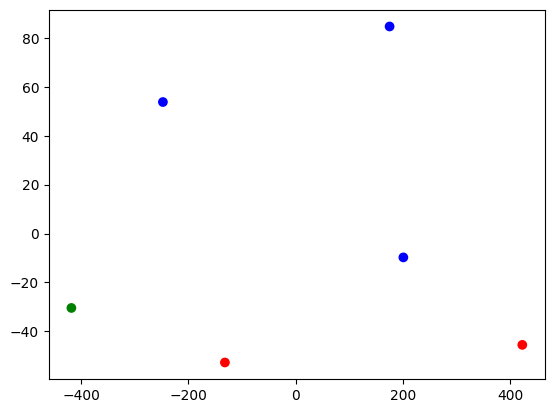

In [107]:
xs = transformed_DR[:,0]
ys = transformed_DR[:,1]
plt.scatter(xs, ys, c= species )
plt.show()

### TruncatedSVD and csr_matrix 
- csr_matrices save space by remembering only the non-zero entries of the array
- word-frequency array measure how often each word appears in each document

In [ ]:
# from sklearn.decomposition import TruncatedSVD
# pca_T = TruncatedSVD(n_components = 2)
# pca_T.fit(document)
# transformed_T = pca_T.transform(document)

### tf-idf word frequency array 
create a tf-idf word frequency array for a toy collection of documents. For this, use the TfidfVectorizer from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. It has fit() and transform() methods like other sklearn objects.
- the frequency of each word in the document
- "tf" is the frequency of the word in the document
- "idf" is a weighting scheme that reduces the influence of frequent words like "the"

In [108]:
# # Import TfidfVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Create a TfidfVectorizer: tfidf
# tfidf = TfidfVectorizer() 

# # Apply fit_transform to document: csr_mat
# csr_mat = tfidf.fit_transform(documents)

# # Print result of toarray() method
# print(csr_mat.toarray())

# # Get the words: words
# words = tfidf.get_feature_names()

# # Print words
# print(words)

# Non-negative matrix factorization (NMF)
- In constract to PCA, however, NMF models are interpretable
- It is required that the sample features be "non-negative", so greater than or equal to 0. 

In [114]:
tf = np.array([[0.2, 0.3, 0.0, 0.1],
              [0.0, 0.0, 0.4, 0.1],
              [0.4, 0.3, 0.2, 0.1]])
tf

array([[0.2, 0.3, 0. , 0.1],
       [0. , 0. , 0.4, 0.1],
       [0.4, 0.3, 0.2, 0.1]])

In [116]:
from sklearn.decomposition import NMF
model_NMF = NMF(n_components =2)
model_NMF.fit(tf)
nmf_feautures = model_NMF.transform(tf)
nmf_feautures # 2 columns, as n_components = 2

array([[0.38841861, 0.        ],
       [0.        , 0.55781065],
       [0.5244715 , 0.26302724]])

In [118]:
model_NMF.components_

array([[0.66323691, 0.64296951, 0.01302556, 0.16365346],
       [0.03606107, 0.        , 0.7202388 , 0.15646267]])

### Reconstruction of a sample

In [122]:
tf[2,:]

array([0.4, 0.3, 0.2, 0.1])

In [123]:
nmf_feautures[2,:]

array([0.5244715 , 0.26302724])

In [125]:
# product of matrices = iloczyn macierzy
#m ultiplying components by feature values and add up (dot product)
new_s = (nmf_feautures[2,:].dot(model_NMF.components_))
new_s 

array([0.3573339 , 0.33721918, 0.19627396, 0.12698552])

In [126]:
# vector_a = 2 + 3j 
# vector_b = 4 + 5j

# now dot product 
# product = np.dot(vector_a, vector_b

# = 2(4 + 5j) + 3j(4 +5j) 
# = 8 + 10j + 12j - 15 
# = -7 + 22j

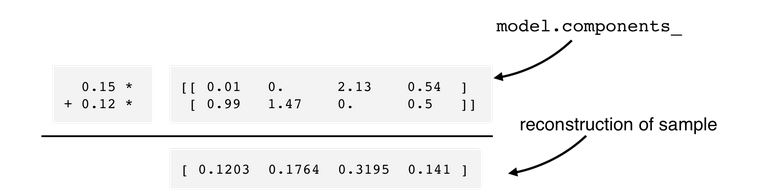

In [128]:
from PIL import Image 
from IPython.display import display
img = Image. open('reconstruction.jpg')
display(img)

### "grayscale image"
- An image in which all the pixels are shades of gray ranging from black to white

In [131]:
gray = np.round(np.random.uniform(low=0, high=1.1, size=(2,3)),1)
gray

array([[0.8, 0.1, 0.8],
       [1. , 0.7, 0.3]])

In [132]:
gray_flatten = gray.flatten()

array([0.8, 0.1, 0.8, 1. , 0.7, 0.3])

<function matplotlib.pyplot.show(close=None, block=None)>

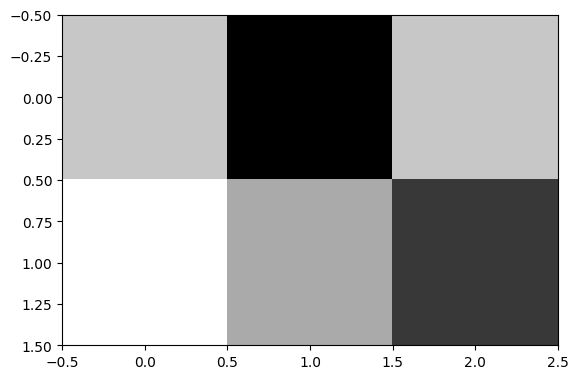

In [134]:
plt.imshow(gray, cmap= 'gray', interpolation= 'nearest')
plt.show

### finding the similar case by comparing cosin of each rows feautures
- the same cosin = the same subject, cloer to 0 point more bulshit article, higher score more strong article
- comparing 'CC' ---> 'DD' the most simillar

In [137]:
from sklearn.preprocessing import normalize
norm_feautures = normalize(nmf_feautures)
norm_feautures

array([[1.        , 0.        ],
       [0.        , 1.        ],
       [0.89388695, 0.44829245]])

In [139]:
current_article = norm_feautures[2,:]
similarities = norm_feautures.dot(current_article)
similarities

array([0.89388695, 0.44829245, 1.        ])

In [153]:
titles = ['DD', "GG", "CC"]

In [154]:
df = pd.DataFrame(norm_feautures, index=titles)
df

,0,1
DD,1.000000,0.000000
GG,0.000000,1.000000
CC,0.893887,0.448292


In [159]:
current_artcle_2 = df.loc['CC']
si = df.dot(current_artcle_2)
si

DD    0.893887
GG    0.448292
CC    1.000000
dtype: float64

In [160]:
si.nlargest()

CC    1.000000
DD    0.893887
GG    0.448292
dtype: float64

# 1. Practice: Dominant colors in images

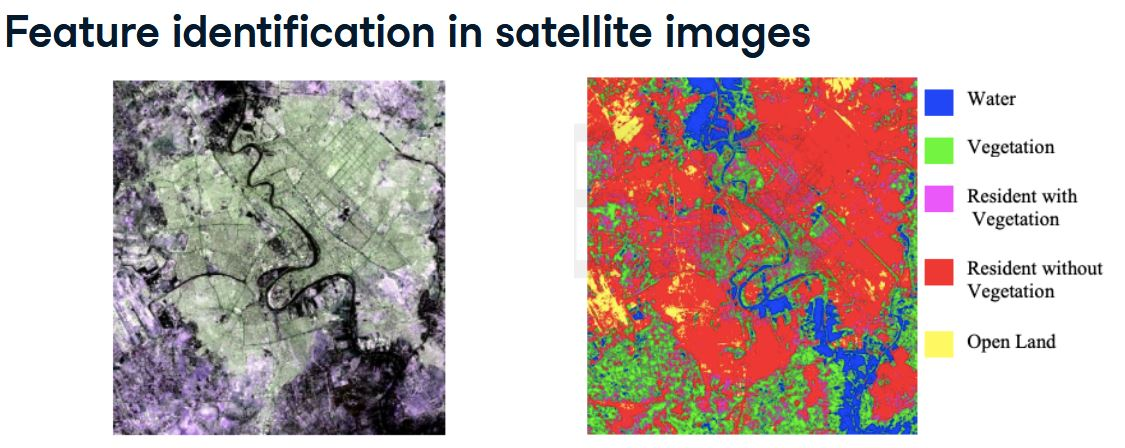

In [89]:
from PIL import Image 
from IPython.display import display
img = Image. open('map.jpg')
display(img)

In [ ]:
# convert image to pixels RGB
matplotlib.img.imread

# display colors of the cluster centers
matplotlib.pyplot.imshow

In [92]:
import matplotlib.image as img
image = img.imread('sea.jpg')
image.shape

(549, 892, 3)

In [93]:
r = []
g = []
b = []

for row in image:
    for pixel in row:
        # A pixel contains RGB values
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

In [95]:
pixels = pd.DataFrame({'red': r, 'blue': b, 'green':g})
pixels.head()

,red,blue,green
0,255,255,255
1,255,255,255
2,232,232,232
3,228,228,228
4,232,232,232


In [105]:
from scipy.cluster.vq import whiten

scaled_pixels = whiten(pixels)
scaled_pixels =pd.DataFrame(scaled_pixels, columns =['scaled_red', 'scaled_blue','scaled_green'])
scaled_pixels.head()

,scaled_red,scaled_blue,scaled_green
0,2.629505,3.461795,3.200615
1,2.629505,3.461795,3.200615
2,2.392334,3.149555,2.911932
3,2.351087,3.095252,2.861726
4,2.392334,3.149555,2.911932


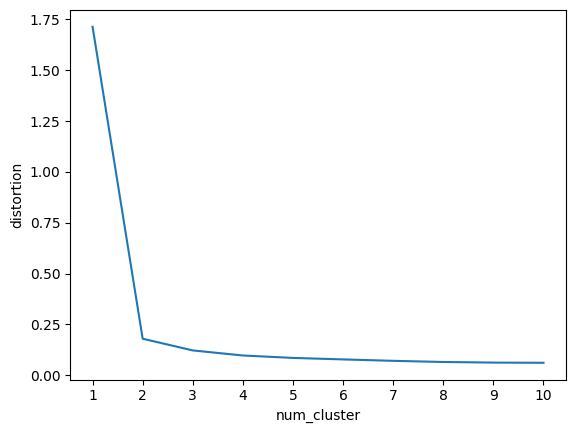

In [112]:
distortions = []
num_cluster = range(1,11)

for i in num_cluster:
    centroids, dist = kmeans(scaled_pixels[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(dist)
    
elbo_data = pd.DataFrame({'num_cluster':num_cluster,
             'distortion': distortions})

sns.lineplot(x ='num_cluster', y ='distortion', data = elbo_data )
plt.xticks(num_cluster)
plt.show()

In [119]:
# imshow method, takes RGB values that have been scaled to the range of 0 to 1
# To do that, we need to revvert scaled color and divided by 255
# scaled = number/std

cluster_centers, dist = kmeans(scaled_pixels[['scaled_red', 'scaled_blue', 'scaled_green']], 2)

colors = []

# Get standard deviations of each color
r_std, g_std, b_std =pixels[['red', 'blue', 'green']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * g_std / 255
    ))
colors

[(0.13716949077846138, 0.335432640291028, 0.2609923261128764),
 (0.894480012167134, 0.9006006006099093, 0.830635689335929)]

In [129]:
colors_arr = np.array(colors)
colors_arr.shape

(2, 3)

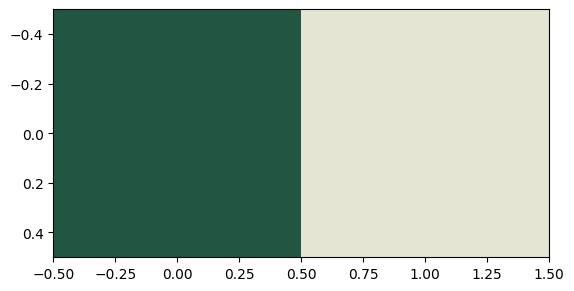

In [123]:
# Display colors of cluster centers
# imshow method expects a MxNx3 matrix to display a 2D grid of colors
# we are providing a 1xNx3 matrix
plt.imshow([colors])
plt.show()

# 2. Practice: Document clustering

- Term Frequency:
    - tf(t,d) = count of t in d / number of words in d
- Document Frequency: 
    - df(t) = occurrence of t in documents\
- Inverse Document Frequency:
    - df(t) = N(t)\
        where\
        df(t) = Document frequency of a term t\
        N(t) = Number of documents containing the term t\
        idf(t) = N/ df(t) = N/N(t)
        idf(t) = log(N/ df(t))\
- Normalized Term Frequency (tf)
- Inverse Document Frequency (idf)
    - tf-idf(t, d) = tf(t, d) * idf(t)

In [136]:
from nlth.tokenize import word_tokenize
import re

def remove_noise(text, stop_words = []):
    tokens = word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:
        token = re.sub('[^A-Za-z0-9]+', '', token)
        if len(token) > 1 and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

ModuleNotFoundError: No module named 'nlth'

In [ ]:
remove_noise("It is lovely weather we are having. I hope the weather continues")

### Pipeline 
- most similar letter do 'GG'

In [162]:
tf = np.array([[0.2, 0.3, 0.0, 0.1],
              [0.0, 0.0, 0.4, 0.1],
              [0.4, 0.3, 0.2, 0.1]])
titles = ['DD', "GG", "CC"]
df = pd.DataFrame(norm_feautures, index=titles)

In [164]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components = 2)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(tf)

# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(tf, index = titles)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['GG']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())

GG    0.17
CC    0.09
DD    0.01
dtype: float64


### Visualize cluster

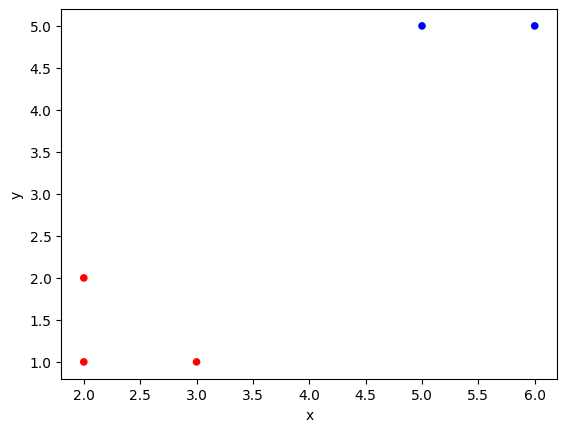

In [30]:
import matplotlib.pyplot as plt

dfv =pd.DataFrame({
    'x': [2,3,5,6,2],
    'y': [1,1,5,5,2],
    'labels': ['A','A','B','B','A']
})

colors = {'A':'red', 'B': 'blue'}


dfv.plot.scatter(x= 'x',y = 'y', c = dfv['labels'].apply(lambda x: colors[x]))
plt.show()

In [28]:
colors['A']

'red'

<Axes: xlabel='x', ylabel='y'>

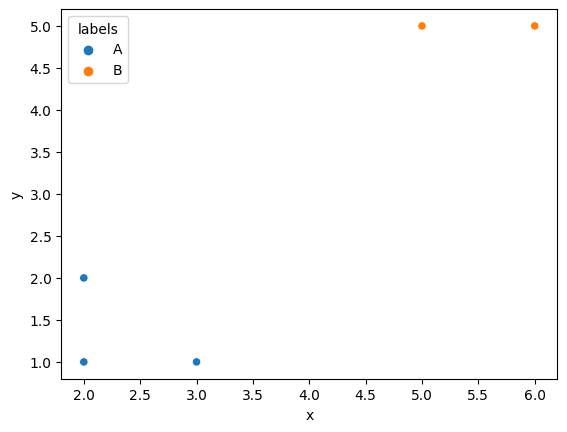

In [33]:
import seaborn as sns

sns.scatterplot(x= 'x',y = 'y', hue = 'labels', data=dfv)

# Reduce dimensionality
- df.drop("column_name", axis =1)
- sns.pairplot()
- VarianceThreshold()
- isna()
- Recursive Feature Elimination

In [138]:
samples =pd.DataFrame({
    'year': [1950, 1970, 1990, 2010, 2050, 2100],
    'pop': [2.519, 3.692, 5.263, 6.9720,  8.94, 10.85],
    'areaa': [1009, 455, 789, 170, 344, 767],
    'continent':['E', "U", 'A', "E", 'A', 'E']
})
samples

,year,pop,areaa,continent
0,1950,2.519,1009,E
1,1970,3.692,455,U
2,1990,5.263,789,A
3,2010,6.972,170,E
4,2050,8.940,344,A
5,2100,10.850,767,E


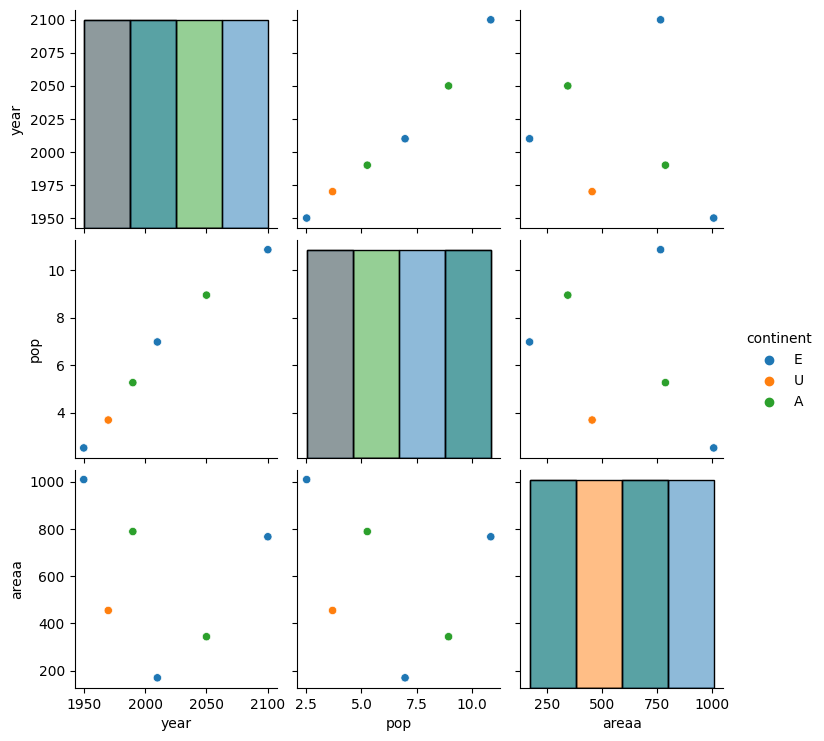

In [139]:
sns.pairplot(samples, hue = 'continent', diag_kind = 'hist')
plt.show()

- ukośna linia między dwoma zmiennym oznacza wysoką korelację, można wtedy usunąć jedną z cech
- pozioma cech oznacza brak wariancji, można taką cechę usunąć
- hue nanosi kolory na wykresy, jeśli okaże się, że jest tylko jeden kolor to można taką cechę usunąć

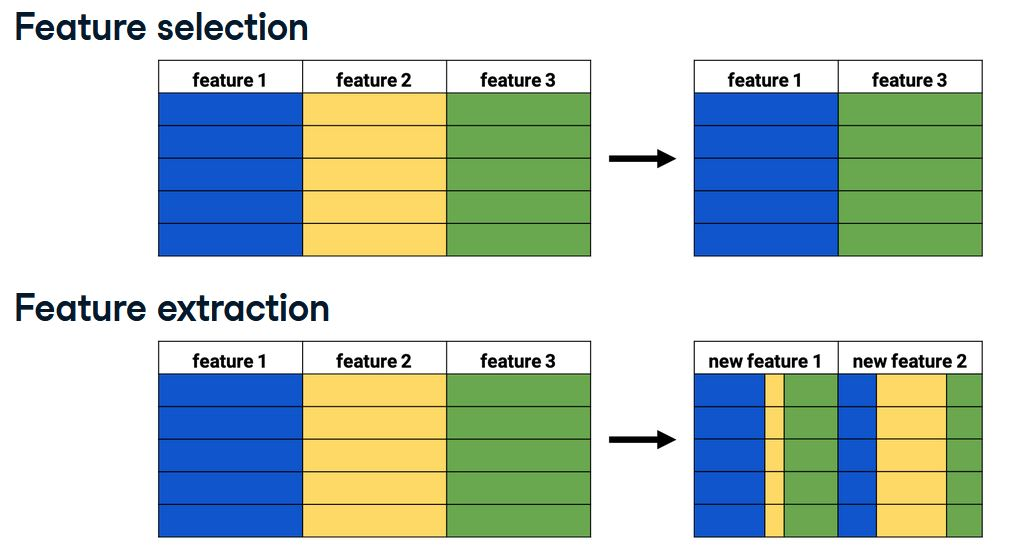

In [140]:
from PIL import Image 
from IPython.display import display
img = Image. open('feature.jpg')
display(img)

- dataset with a lot of strong correlations between the different features, can be reduced a lot with feature extraction -dimention reduce

In [155]:
ansur_f = pd.read_csv('data/ANSUR_II_FEMALE.csv')
non_numeric = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch']
ansur_f_numeric = ansur_f.drop(non_numeric, axis = 1)

from sklearn.feature_selection import VarianceThreshold

# we choose variance of one
sel = VarianceThreshold(threshold =1)
sel.fit(ansur_f_numeric)

# give us a True or False value on whether each feature's variance is above the threshold or not.
mask = sel.get_support()
print(mask)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True]


In [158]:
reduced_ansur = ansur_f_numeric.loc[:,mask]
print(f'ansur_f_numeric: {reduced_ansur.shape}, ansur_f_numeric: {ansur_f_numeric.shape}')

ansur_f_numeric: (1986, 93), ansur_f_numeric: (1986, 94)


In [162]:
# problems of variance, buttocks from ansur df
buttock_df = ansur_f_numeric[['buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength']]

<Axes: >

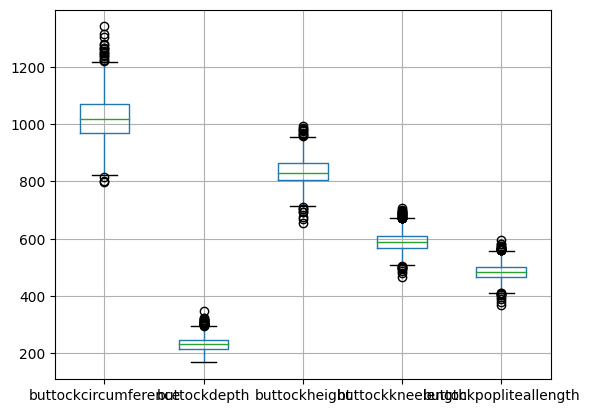

In [165]:
buttock_df.boxplot()

### Normalizing the variance

In [166]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold =0.005)
sel.fit(ansur_f_numeric/ansur_f_numeric.mean())
mask_normalized = sel.get_support()
ansur_f_numeric.loc[:,mask_normalized].shape

(1986, 27)

### IsNA

In [177]:
pokemon = pd.read_csv('data/pokemon.csv', index_col = 0)
pokemon.isna().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [178]:
pokemon.isna().sum()/len(pokemon)

Name          0.0000
Type 1        0.0000
Type 2        0.4825
Total         0.0000
HP            0.0000
Attack        0.0000
Defense       0.0000
Sp. Atk       0.0000
Sp. Def       0.0000
Speed         0.0000
Generation    0.0000
Legendary     0.0000
dtype: float64

In [179]:
pok_3 =pokemon.isna().sum()/len(pokemon) <0.3
reduced_pokemon = pokemon.loc[:,pok_3]
reduced_pokemon.head()

,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,309,39,52,43,60,50,65,1,False


### Pairwise correlation

In [180]:
ansur_f.columns

Index(['Branch', 'Component', 'Gender', 'abdominalextensiondepthsitting',
       'acromialheight', 'acromionradialelength', 'anklecircumference',
       'axillaheight', 'balloffootcircumference', 'balloffootlength',
       'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth',
       'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc',
       'bitragionsubmandibulararc', 'bizygomaticbreadth',
       'buttockcircumference', 'buttockdepth', 'buttockheight',
       'buttockkneelength', 'buttockpopliteallength', 'calfcircumference',
       'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth',
       'chestheight', 'crotchheight', 'crotchlengthomphalion',
       'crotchlengthposterioromphalion', 'earbreadth', 'earlength',
       'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'fun

In [189]:
ansur_f[['suprasternaleheight', 'cervicaleheight', 'chestheight']].corr()

,suprasternaleheight,cervicaleheight,chestheight
suprasternaleheight,1.000000,0.980165,0.924047
cervicaleheight,0.980165,1.000000,0.916012
chestheight,0.924047,0.916012,1.000000


<Axes: >

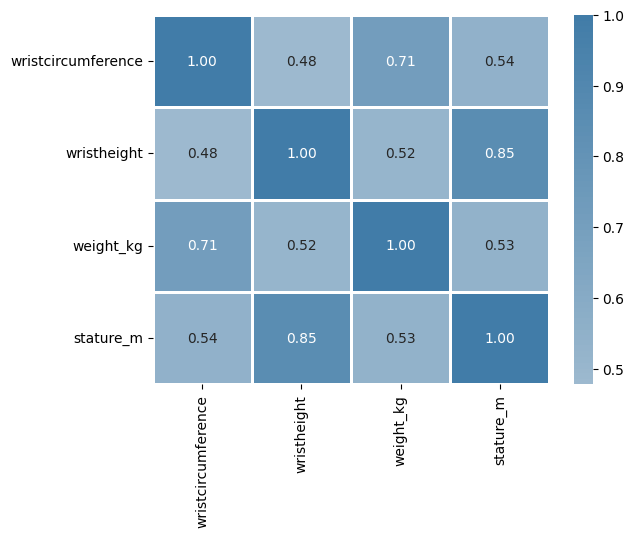

In [193]:
cmap = sns.diverging_palette(h_neg =10, h_pos = 240, as_cmap = True) 

sns.heatmap(ansur_f[['wristcircumference', 'wristheight',
       'weight_kg', 'stature_m']].corr(), center= 0, cmap=cmap, linewidths =1, annot = True, fmt = '.2f' )

<Axes: >

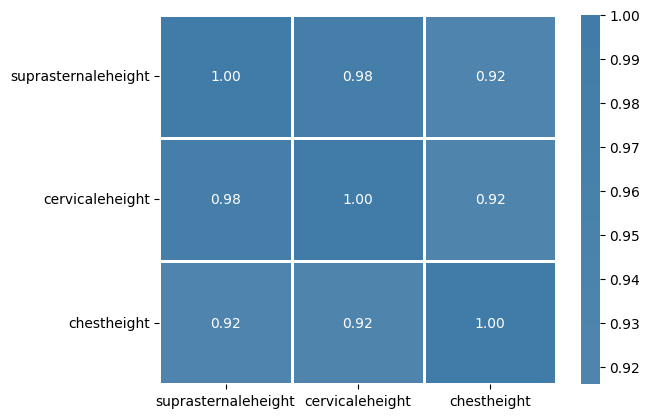

In [190]:
cmap = sns.diverging_palette(h_neg =10, h_pos = 240, as_cmap = True) 

sns.heatmap(ansur_f[['suprasternaleheight', 'cervicaleheight', 'chestheight']].corr(), center= 0, cmap=cmap, linewidths =1, annot = True, fmt = '.2f' )

In [191]:
corr = ansur_f[['suprasternaleheight', 'cervicaleheight', 'chestheight']].corr()

mask = np.triu(np.ones_like(corr, dtype =bool))
mask

array([[ True,  True,  True],
       [False,  True,  True],
       [False, False,  True]])

<Axes: >

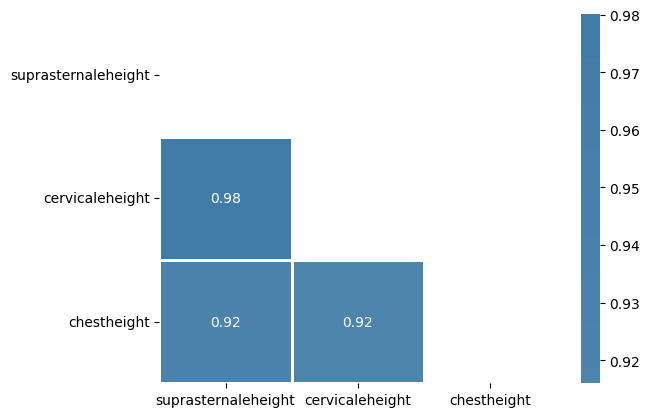

In [192]:
sns.heatmap(ansur_f[['suprasternaleheight', 'cervicaleheight', 'chestheight']].corr(), mask = mask, center= 0, cmap=cmap, linewidths =1, annot = True, fmt = '.2f' )

In [195]:
abs_df = ansur_f[['suprasternaleheight', 'cervicaleheight', 'chestheight']].corr().abs()
abs_df

,suprasternaleheight,cervicaleheight,chestheight
suprasternaleheight,1.000000,0.980165,0.924047
cervicaleheight,0.980165,1.000000,0.916012
chestheight,0.924047,0.916012,1.000000


In [196]:
mask_abs = np.triu(np.ones_like(abs_df, dtype =bool))
tri_df = abs_df.mask(mask_abs)
tri_df

,suprasternaleheight,cervicaleheight,chestheight
suprasternaleheight,NaN,NaN,NaN
cervicaleheight,0.980165,NaN,NaN
chestheight,0.924047,0.916012,NaN


In [199]:
# find columns that meat threshold
to_drop = [c for c in tri_df.columns if any(tri_df[c]>0.95) ]
to_drop

['suprasternaleheight']

In [201]:
reduce_df = ansur_f.drop(to_drop, axis = 1)

# Recursive Feature Elimination

In [205]:
# Comparing coefficient, to do that we should before Standarized the data
churn_df = pd.read_csv('telecom_churn_clean.csv')

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# random_state=30, max_iter=500
log_reg = LogisticRegression(max_iter=10000)

X = churn_df.drop("churn", axis=1)
y = churn_df["churn"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg.fit(X_train_scaled, y_train)
predictions = log_reg.predict(X_test_scaled)
pred_probability = log_reg.predict_proba(X_test)
accu_a = accuracy_score(y_test, predictions)

a = dict(zip(X_train.columns, abs(log_reg.coef_[0])))
a

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


{'Unnamed: 0': 0.13082989834314962,
 'account_length': 0.08889597024130672,
 'area_code': 0.007018204549190366,
 'international_plan': 0.6336138252770344,
 'voice_mail_plan': 0.9773119638793751,
 'number_vmail_messages': 0.5973879242128243,
 'total_day_minutes': 0.3687778322213962,
 'total_day_calls': 0.06488774541219612,
 'total_day_charge': 0.36626689602979634,
 'total_eve_minutes': 0.18125724813009178,
 'total_eve_calls': 0.07211793245289361,
 'total_eve_charge': 0.1708502974857278,
 'total_night_minutes': 0.09064595074498465,
 'total_night_calls': 0.07374364692785626,
 'total_night_charge': 0.09931165914554037,
 'total_intl_minutes': 0.08250114529697382,
 'total_intl_calls': 0.2493865402464046,
 'total_intl_charge': 0.1651578830055772,
 'customer_service_calls': 0.6241389233136007}

In [206]:
accu_a

0.864

In [208]:
# drop column with lowest coeficient score
X.drop('area_code', axis = 1, inplace =True)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg.fit(X_train_scaled, y_train)
predictions = log_reg.predict(X_test_scaled)
pred_probability = log_reg.predict_proba(X_test)
accu_b = accuracy_score(y_test, predictions)

b = dict(zip(X_train.columns, abs(log_reg.coef_[0])))
b

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


{'Unnamed: 0': 0.13098552969098892,
 'account_length': 0.08909722056112915,
 'international_plan': 0.6331651736055948,
 'voice_mail_plan': 0.9768877479368618,
 'number_vmail_messages': 0.5970467074331433,
 'total_day_minutes': 0.3688269750008651,
 'total_day_calls': 0.06481758133041746,
 'total_day_charge': 0.36632174215948016,
 'total_eve_minutes': 0.1811680587575658,
 'total_eve_calls': 0.07207997413867617,
 'total_eve_charge': 0.17067260117872068,
 'total_night_minutes': 0.0906117252649347,
 'total_night_calls': 0.07379614075942928,
 'total_night_charge': 0.09934943490581041,
 'total_intl_minutes': 0.08241872333778294,
 'total_intl_calls': 0.24938930192970873,
 'total_intl_charge': 0.16535242743012574,
 'customer_service_calls': 0.623978737594777}

In [209]:
accu_b

0.865

In [210]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 2, verbose =1)